# $\Sigma^+$ reconstruction with IP constraint and refitted/dispalced $\pi^0$

## Cuts
- PID cut on proton and keep only protons with impact parameter larger than 0.01 cm.
- Keep only $\Sigma^+$ in mass range 1.18 ~ 1.20 GeV.
- IP constriant on $\Sigma^+$ vertex.
- Require the daughters of $\pi^0$ to have energy greater than 50 MeV 

## Code snapshot
```
ma.fillParticleList('p+:good', 'pid_ppi > 0.6 and pid_pk > 0.6 and abs(d0) >= 0.01', path = mp)
# Put a wide 20 MeV mass cut around the nominal mass
sigma_mass_cut = 'M >= 1.18 and M <= 1.20'
ma.reconstructDecay('Sigma+:all -> p+:good pi0:mdst', 
                    'M >= 1.18 and M <= 1.20', path = mp)
ma.vertexTree('Sigma+:all', 0, ipConstraint = True, massConstraint = [],
              updateAllDaughters = True, path = mp)

# Discard the low momentum pi0s as in the Belle note  
ma.cutAndCopyList('pi0:displaced', 'pi0:mdst', 'daughter(0, E) >= 0.04 and daughter(1, E) >= 0.04 and p >= 0.1 and M >= 0.12 and M <= 0.15', path = mp)

# Refit Sigma+ with displaced pi0
ma.reconstructDecay('Sigma+:updated -> p+:good pi0:displaced', '', path = mp)
ma.vertexTree('Sigma+:updated', 0, ipConstraint = True, massConstraint = [111], path = mp)
# ma.matchMCTruth('Sigma+:all', path = mp)
ma.matchMCTruth('Sigma+:updated')
```

In [7]:
from root_pandas import read_root
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdg
import seaborn as sns
import glob

In [4]:
plt.rc('figure', figsize = (8, 6))
plt.rc('font', size = 13)
plt.rc('hist', bins = 200)

In [6]:
root_files = glob.glob('../data/sigma_ipconstraint_only/*.root')
print("%d root files found" % len(root_files))
#columns = ['M', 'pi0_M', 'isSignal', 'p_d0', 'p_z0', 'pi0_p', 'p', 'dr', 'dz', 'pi0_isSignal', 'chiProb']
%time sigma = read_root(root_files, 'sigma')

100 root files found
CPU times: user 1min 43s, sys: 1min 10s, total: 2min 53s
Wall time: 2min 59s


In [8]:
sigma.head()

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,ErrM,px,py,...,pi0_cosaXY,pi0_isSignal,pi0_isPrimarySignal,pi0_mcErrors,pi0_mcPDG,pi0_genMotherID,pi0_genMotherP,pi0_genMotherPDG,pi0_genParticleID,pi0_nMCMatches
0,55,24,5,0,2,1.0,1.219826,0.004326,0.437431,-0.492119,...,-0.975032,0.0,0.0,1339.0,300553.0,0.0,0.000000,0.0,0.0,1.0
1,55,24,5,1,2,1.0,1.210075,0.004558,0.428146,-0.486382,...,-0.987499,0.0,0.0,1331.0,521.0,0.0,4.506553,300553.0,1.0,1.0
2,55,24,25,0,3,1.0,1.183689,0.003545,0.042026,-0.246864,...,0.042527,0.0,0.0,438.0,521.0,0.0,4.492920,300553.0,1.0,1.0
3,55,24,25,1,3,1.0,1.178932,0.003817,-0.113185,-0.193152,...,0.142311,1.0,0.0,0.0,111.0,18.0,0.035264,-321.0,39.0,1.0
4,55,24,25,2,3,1.0,1.167514,0.005387,-0.079662,-0.556225,...,-0.921026,0.0,0.0,314.0,300553.0,0.0,0.000000,0.0,0.0,1.0


In [9]:
len(sigma)

5760542

In [10]:
unique_events = sigma[['__experiment__', '__run__', '__event__']].drop_duplicates()
unique_events.head()

,__experiment__,__run__,__event__
0,55,24,5
2,55,24,25
5,55,24,27
6,55,24,32
8,55,24,38


In [11]:
len(unique_events)

1096565

In [12]:
sigma.iloc[unique_events.index].__ncandidates__.describe()

count    1.096565e+06
mean     4.239105e+00
std      4.180718e+00
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      1.020000e+02
Name: __ncandidates__, dtype: float64

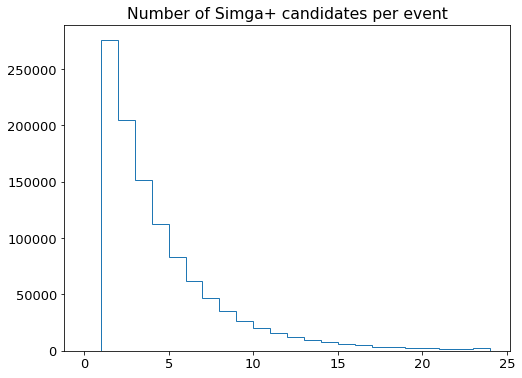

In [13]:
plt.hist(sigma.iloc[unique_events.index].__ncandidates__, bins = range(0, 25), histtype = 'step')
plt.title('Number of Simga+ candidates per event')
plt.show()

## $\Sigma^+$ and $\pi^0$ mass distribution

In [14]:
pdg.get('Sigma+')

<Particle "Sigma+" mass=1.18937 width=0 charge=1 pdg=3222>

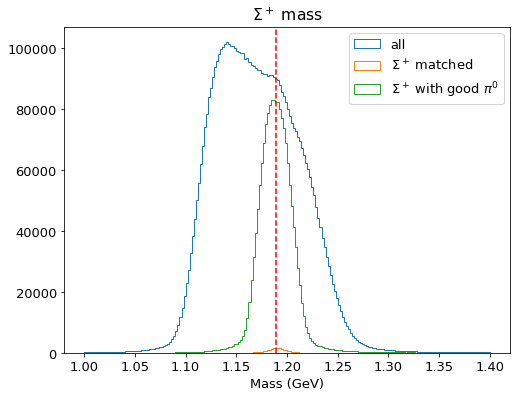

In [22]:
plt.hist(sigma.M, range = [1, 1.4], histtype = 'step', label = 'all')
plt.hist(sigma[sigma.isSignal == 1].M, range = [1, 1.4], histtype = 'step', label = '$\Sigma^+$ matched')
plt.hist(sigma[(sigma.pi0_M >= 0.12) & (sigma.pi0_M < 0.15)].M, range = [1, 1.4], histtype = 'step', label = '$\Sigma^+$ with good $\pi^0$')
plt.axvline(x = 1.18937, color = 'red', linestyle = '--')
plt.legend()
plt.xlabel('Mass (GeV)')
plt.title('$\Sigma^+$ mass')
plt.show()

In [16]:
pdg.get('pi0')

<Particle "pi0" mass=0.134977 width=0 charge=0 pdg=111>

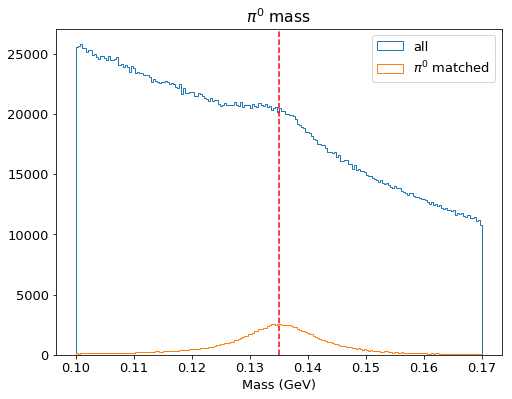

In [17]:
plt.hist(sigma.pi0_M, range = [.1, .17], histtype = 'step', label = 'all')
plt.hist(sigma[sigma.pi0_isSignal == 1].pi0_M, range = [.1, .17], histtype = 'step', label = '$\pi^0$ matched')
plt.axvline(x = 0.134977, color = 'red', linestyle = '--')
plt.legend()
plt.xlabel('Mass (GeV)')
plt.title('$\pi^0$ mass')
plt.show()

## Vertex position of $\Sigma^+$

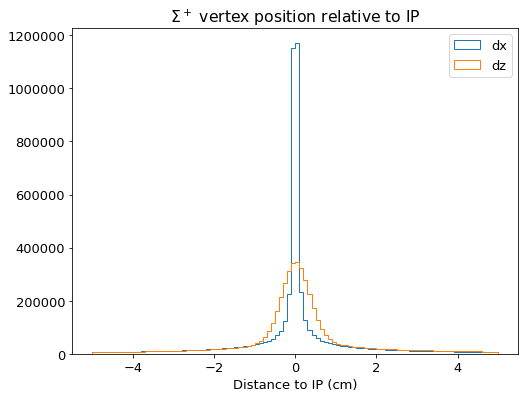

In [18]:
plt.hist(sigma.x - sigma.IPX, bins = 100, range = [-5, 5], histtype = 'step', label = 'dx')
plt.hist(sigma.z - sigma.IPZ, bins = 100, range = [-5, 5], histtype = 'step', label = 'dz')
plt.title('$\Sigma^+$ vertex position relative to IP')
plt.xlabel('Distance to IP (cm)')
plt.legend()
plt.show()

## Vertex position of $\pi^0$

The vertex positions of $\pi^0$ and $\Sigma^+$ are the same as expected.

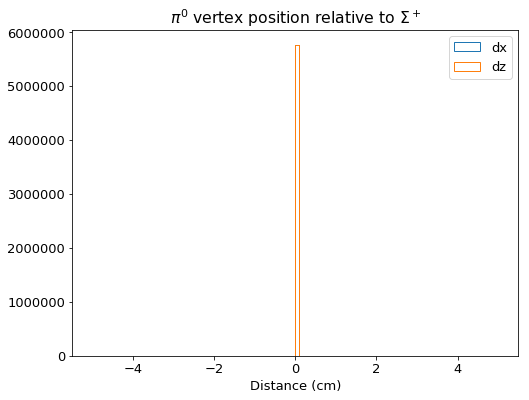

In [19]:
plt.hist(sigma.pi0_x - sigma.x, bins = 100, range = [-5, 5], histtype = 'step', label = 'dx')
plt.hist(sigma.pi0_z - sigma.z, bins = 100, range = [-5, 5], histtype = 'step', label = 'dz')
plt.title('$\pi^0$ vertex position relative to $\Sigma^+$')
plt.xlabel('Distance (cm)')
plt.legend()
plt.show()

## What are the particles reconstructed as $\Sigma^+$?

In [20]:
def pdg_to_names(plist):
    import pdg
    name_list = []
    for part in plist:
        try:
            name_list += [pdg.to_name(part)]
        except:
            name_list += ['PDG = %d' % part]
    return name_list

def plot_particle_names(df, title = ''):
    df = df.value_counts().nlargest(20)
    df.index = pdg_to_names(df.index.astype('int'))
    df.plot('barh', log = True, figsize = (8, 8))
    plt.title(title)

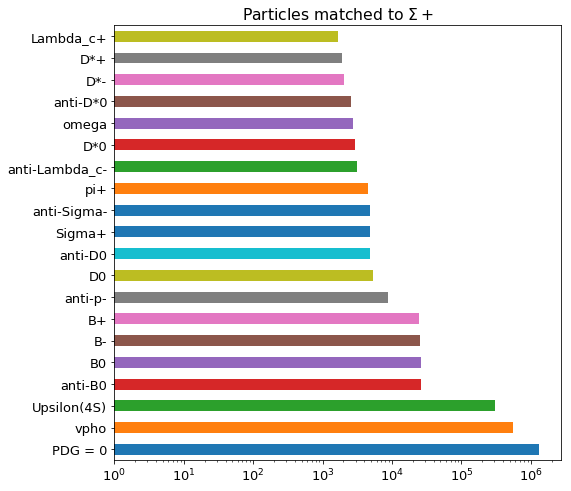

In [21]:
plot_particle_names(sigma[sigma.distance > 2].mcPDG, 'Particles matched to $\Sigma+$')

In [ ]:
pdg.get('Upsilon(4S)')